In [1]:
%%capture
%pip install nbformat
%run utils.ipynb

2025-07-18 20:35:47.100427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-18 20:35:47.100455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-18 20:35:47.101693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-18 20:35:47.107286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-18 20:35:47.913385: W tensorflow/compiler/tf2

In [2]:
train_noise = sample_noise(x_train.shape)
test_noise = sample_noise(x_test.shape)

In [3]:
noise_factor = 0.5
noisy_x_train = x_train + noise_factor * sample_noise(x_train.shape)
noisy_x_train = np.clip(noisy_x_train, 0., 1.)

noisy_x_test = x_test + noise_factor * sample_noise(x_test.shape)
noisy_x_test = np.clip(noisy_x_test, 0., 1.)

In [4]:
denoising_autoencoder = models.Model(encoder.input, decoder(encoder(encoder.input)))
denoising_autoencoder.summary(show_trainable=True)
denoising_autoencoder.compile(optimizer='adam', loss='mae')
denoising_autoencoder.fit(noisy_x_train, x_train, epochs=5, batch_size=128, validation_data=(noisy_x_test, x_test))

Model: "model_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         Y          
                                                                            
 model (Functional)          (None, 64)                428608    Y          
                                                                            
 model_1 (Functional)        (None, 28, 28, 1)         468545    Y          
                                                                            
Total params: 897153 (3.42 MB)
Trainable params: 897153 (3.42 MB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________________________
Epoch 1/5
469/469 [==============================] - 47s 98ms/step - loss: 0.2152 - val_loss: 0.2098
Epoch 2/5
469/469 [==============================] - 47s 101ms/step - loss: 0.2098 - va

1/1 [==============================] - 0s 110ms/step


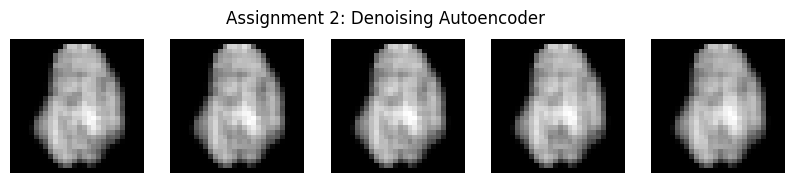

In [5]:
# Generate images from noise
noise = sample_noise((5, latent_dim))
generated = decoder.predict(noise)
show_images(generated, "Assignment 2: Denoising Autoencoder")